In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/times.ttf')
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
import pandas as pd
import numpy as np


/tmp/ipykernel_174185/3629162287.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 6, 1)


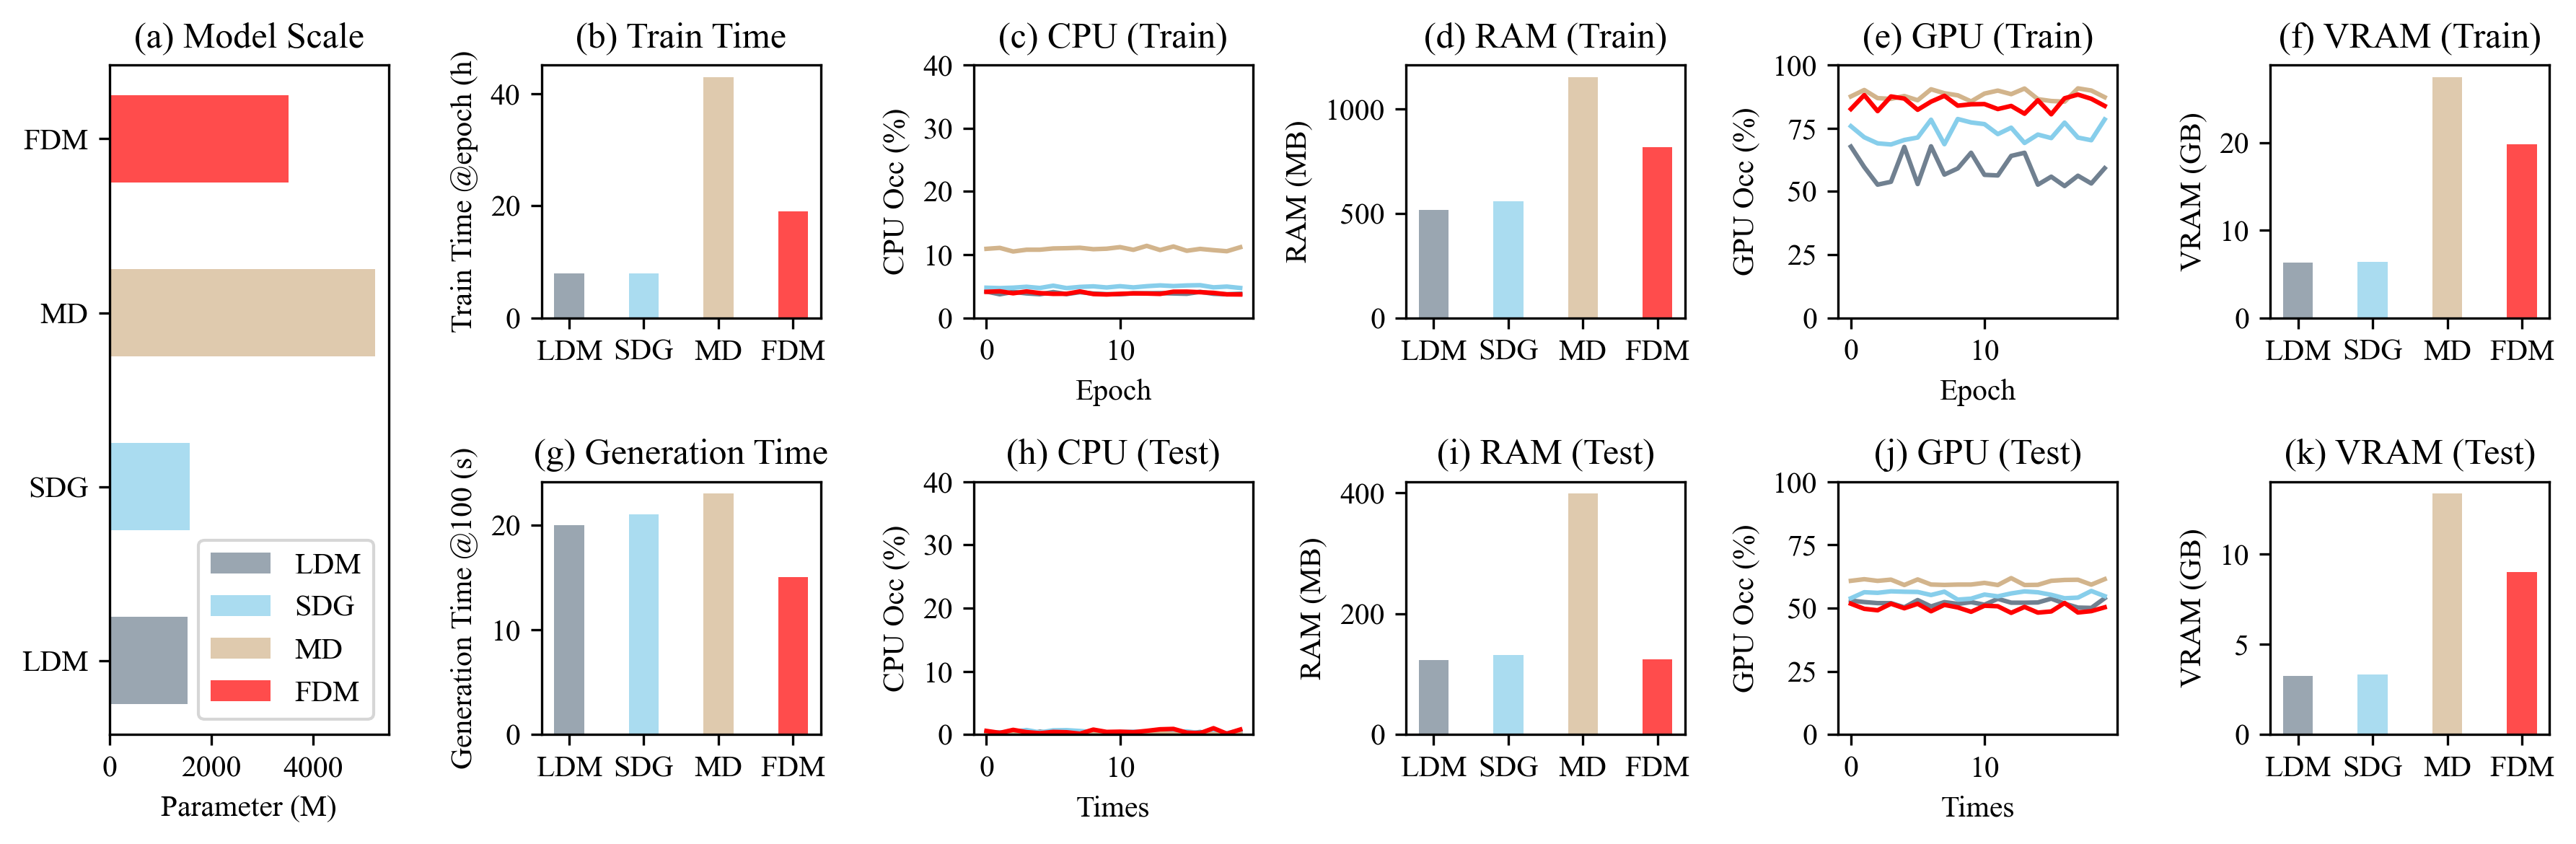

In [8]:
Method=["LDM","SDG","MD","FDM"]
Color=["slategrey","skyblue","tan","red"]

Scale=[1537,1571,5210,3516] # M
Train_Time_Epoch=[8,8,43,19] #h
Gen_Time_100=[20,21,23,15] #s

bar_width = 0.4
font_size = 14

data=pd.read_csv('train.csv').values

CPU=data[:4]
RAM=data[4:8].mean(axis=1)
GPU=data[8:12]
VRAM=data[12:].mean(axis=1)

data=pd.read_csv('test.csv').values

CPU2=data[:4]
RAM2=data[4:8].mean(axis=1)
GPU2=data[8:12]
VRAM2=data[12:].mean(axis=1)

fig, axe = plt.subplots(nrows=2, ncols=6, figsize=(12, 4),dpi=300)

plt.subplot(1, 6, 1)
plt.barh(Method, Scale, height=0.5, color=Color, alpha=0.7, label=Method)
plt.xlabel('Parameter (M)')
plt.title('(a) Model Scale')
plt.legend()

plt.subplot(2, 6, 2)
plt.bar(Method, Train_Time_Epoch,color=Color, width=bar_width, alpha=0.7, label=Method)
plt.ylabel('Train Time @epoch (h)')
plt.title('(b) Train Time')


plt.subplot(2, 6, 3)
plt.plot(CPU[0], label=Method[0], color=Color[0])
plt.plot(CPU[1], label=Method[1], color=Color[1])
plt.plot(CPU[2], label=Method[2], color=Color[2])
plt.plot(CPU[3], label=Method[3], color=Color[3])
plt.xlabel('Epoch')
plt.ylabel('CPU Occ (%)')
plt.ylim(0,40)
plt.title('(c) CPU (Train)')
# plt.legend()

plt.subplot(2, 6, 4)
plt.bar(Method, np.array(RAM),color=Color, width=bar_width,alpha=0.7, label=Method)
plt.ylabel('RAM (MB)')
plt.title('(d) RAM (Train)')


plt.subplot(2, 6, 5)
plt.plot(GPU[0], label=Method[0], color=Color[0])
plt.plot(GPU[1], label=Method[1], color=Color[1])
plt.plot(GPU[2], label=Method[2], color=Color[2])
plt.plot(GPU[3], label=Method[3], color=Color[3])
plt.xlabel('Epoch')
plt.ylabel('GPU Occ (%)')
plt.ylim(0,100)
plt.title('(e) GPU (Train)')
# plt.legend()

plt.subplot(2, 6, 6)
plt.bar(Method, np.array(VRAM), color=Color, width=bar_width, alpha=0.7, label=Method)
plt.ylabel('VRAM (GB)')
plt.title('(f) VRAM (Train)')

plt.subplot(2, 6, 8)
plt.bar(Method, np.array(Gen_Time_100),color=Color, width=bar_width, alpha=0.7, label=Method)
plt.ylabel('Generation Time @100 (s)')
plt.title('(g) Generation Time')

plt.subplot(2, 6, 9)
plt.plot(CPU2[0], label=Method[0], color=Color[0])
plt.plot(CPU2[1], label=Method[1], color=Color[1])
plt.plot(CPU2[2], label=Method[2], color=Color[2])
plt.plot(CPU2[3], label=Method[3], color=Color[3])
plt.xlabel('Times')
plt.ylabel('CPU Occ (%)')
plt.ylim(0,40)
plt.title('(h) CPU (Test)')
# plt.legend()

plt.subplot(2, 6, 10)
plt.bar(Method, np.array(RAM2),color=Color,width=bar_width, alpha=0.7, label=Method)
plt.ylabel('RAM (MB)')
plt.title('(i) RAM (Test)')


plt.subplot(2, 6, 11)
plt.plot(GPU2[0], label=Method[0], color=Color[0])
plt.plot(GPU2[1], label=Method[1], color=Color[1])
plt.plot(GPU2[2], label=Method[2], color=Color[2])
plt.plot(GPU2[3], label=Method[3], color=Color[3])
plt.xlabel('Times')
plt.ylabel('GPU Occ (%)')
plt.ylim(0,100)
plt.title('(j) GPU (Test)')
# plt.legend()

plt.subplot(2, 6, 12)
plt.bar(Method, np.array(VRAM2),color=Color, width=bar_width, alpha=0.7, label=Method)
plt.ylabel('VRAM (GB)')
plt.title('(k) VRAM (Test)')

fig.tight_layout()
plt.savefig("figure.compute.svg", format = "svg")
plt.savefig("figure.compute.jpg", format = "jpg")
plt.show()